In [1]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
nctssos1=pd.read_csv("data/stock_time_NCTSSOS_k1.csv",header=None) # 5:30
nctssos2=pd.read_csv("data/stock_time_NCTSSOS_k2.csv",header=None) # 5:30
ncpol2sdpa=pd.read_csv("data/stock_time_PY.csv",header=None) # 5:20
#sdpa_es=sdpa.loc[0:9,0:1]
#sdpa_es=sdpa_es.astype('float64')

In [3]:
spar=pd.read_csv("data/sparsity.csv",header=0)

In [4]:
mat1=pd.read_csv("data/stock_time_MAT_d1.csv",header=None)
mat2=pd.read_csv("data/stock_time_MAT_d2.csv",header=None)[0:11]

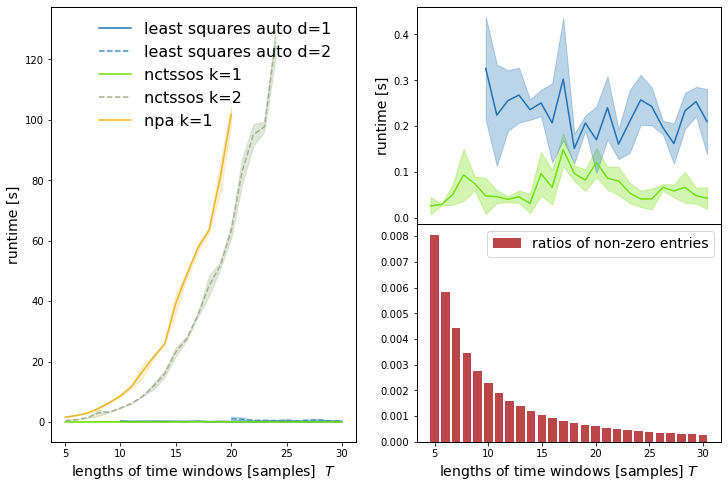

In [16]:
fig = plt.figure(figsize=(12,8))#(figsize=(6,8), dpi=300)
plt.rcParams['axes.linewidth'] = 1
plt.rc('axes', labelsize=6) 

ax=plt.subplot2grid((2,4),(0,0), rowspan=2, colspan=2)
plt.plot(mat1[0],mat1[1], linestyle='-',label="least squares auto d=1  ",color='#2171b5')
plt.plot(mat2[0],mat2[1], linestyle='--',label="least squares auto d=2  ",color='#4292c6')
plt.plot(nctssos1[0],nctssos1[1], linestyle='-',label="nctssos k=1  ",color="#70E000")##E4C1F9
plt.plot(nctssos2[0],nctssos2[1], linestyle='--',label="nctssos k=2  ",color='#A3B18A') #7209B7 #6D597A
plt.plot(ncpol2sdpa[0],ncpol2sdpa[1], linestyle='-',label="npa k=1  ",color="#EEB422")


plt.fill_between(ncpol2sdpa[0],ncpol2sdpa[1]-ncpol2sdpa[2],ncpol2sdpa[1]+ncpol2sdpa[2],color='#EEB422', alpha=0.2)
plt.fill_between(nctssos1[0],nctssos1[1]-nctssos1[2], nctssos1[1]+nctssos1[2],color='#70E000', alpha=0.3)
plt.fill_between(nctssos2[0],nctssos2[1]-nctssos2[2], nctssos2[1]+nctssos2[2],color='#A3B18A', alpha=0.3)
plt.fill_between(mat1[0],mat1[1]-mat1[2], mat1[1]+mat1[2],color='#2171b5', alpha=0.3)
plt.fill_between(mat2[0],mat2[1]-mat2[2], mat2[1]+mat2[2],color='#4292c6', alpha=0.3)

plt.legend(fontsize=16,frameon=False,loc='upper right') #,bbox_to_anchor=(0.5,0.6)
plt.ylabel('runtime [s]',fontsize=14)
plt.xlabel("lengths of time windows [samples]  "+r"$T$",fontsize=14)

ax=plt.subplot2grid((2,4),(0,2), rowspan=1, colspan=2)
plt.plot(nctssos1[0],nctssos1[1], linestyle='-',label="nctssos k=1  ",color="#70E000")##E4C1F9
plt.plot(mat1[0],mat1[1], linestyle='-',label="least squares auto d=1  ",color='#2171b5')

plt.fill_between(nctssos1[0],nctssos1[1]-nctssos1[2], nctssos1[1]+nctssos1[2],color='#70E000', alpha=0.3)
plt.fill_between(mat1[0],mat1[1]-mat1[2], mat1[1]+mat1[2],color='#2171b5', alpha=0.3)
plt.ylabel('runtime [s]',fontsize=14)

ax=plt.subplot2grid((2,4),(1,2), rowspan=1, colspan=2)
s=[spar['col2'][i]/spar['col1'][i] for i in range(len(spar['col1']))]
plt.bar(range(5,31),s,label="ratios of non-zero entries",color="#BC4749")  
plt.legend(fontsize=14)
#plt.bar(range(5,31),(spar['col2']/(10)**6).tolist(), label="number of zero entries",color="white")  
#plt.ylabel("ratios of zero entries",fontsize=14)
plt.xlabel("lengths of time windows [samples] "+r"$T$",fontsize=14)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5,hspace=0.)
plt.savefig('runtime.pdf',bbox_inches = 'tight')

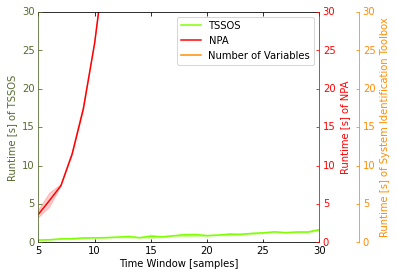

In [4]:
fig = plt.figure(1)
#plt.style.use('bmh')

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)


host.axis['top'].set_visible(True)
host.axis["right"].set_visible(False)
host.axis["bottom"].set_visible(True)

par1.axis["right"].set_visible(True)
par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

offset = (40, 0)
new_axisline = par2._grid_helper.new_fixed_axis
par2.axis["right2"] = new_axisline(loc="right", axes=par2, offset=offset)

fig.add_axes(host)
host.set_xlim(5, 30)
host.set_ylim(0, 30)
par1.set_ylim(0, 30)
par2.set_ylim(0, 30)


host.set_xlabel("Time Window [samples]")
host.set_ylabel("Runtime [s] of TSSOS")
par1.set_ylabel("Runtime [s] of NPA")
par2.set_ylabel("Runtime [s] of System Identification Toolbox")
#par2.set_ylabel("Number of primal variables [samples]")


pA, = host.plot(range(5,31),tssos[0], linestyle='-',label="TSSOS",color="chartreuse")
pAsdpa, = par1.plot(range(5,15),sdpa_es[0], linestyle='-',label="NPA",color="r")
p2, = par2.plot(range(5,31),sdpa[2], label="Number of Variables",color="darkorange")

plt.fill_between(range(5,31),tssos[0]-tssos[1], tssos[0]+tssos[1],color=pA.get_color(), alpha=0.3)

plt.fill_between(range(5,15),sdpa_es[0]-sdpa_es[1],sdpa_es[0]+sdpa_es[1],color=pAsdpa.get_color(), alpha=0.2)


host.legend(loc="best")

hostcolor="darkolivegreen"

host.axis["left"].label.set_color(hostcolor)
par1.axis["right"].label.set_color(pAsdpa.get_color())
par2.axis["right2"].label.set_color(p2.get_color())

host.axis["left"].major_ticks.set_color(hostcolor)
par1.axis['right'].major_ticks.set_color(pAsdpa.get_color())
par2.axis['right2'].major_ticks.set_color(p2.get_color())

host.axis["left"].major_ticklabels.set_color(hostcolor)
par1.axis['right'].major_ticklabels.set_color(pAsdpa.get_color())
par2.axis['right2'].major_ticklabels.set_color(p2.get_color())

host.axis["left"].line.set_color(hostcolor)
par1.axis['right'].line.set_color(pAsdpa.get_color())
par2.axis['right2'].line.set_color(p2.get_color())

fig.set_facecolor('white')

#plt.show()

plt.savefig('runtime_old.pdf', bbox_inches='tight') 
